In [63]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import Row
from  pyspark.sql.functions import input_file_name
from pyspark.sql.functions import col, substring
from pyspark.sql.types import IntegerType

import matplotlib
import matplotlib.pyplot

spark = SparkSession.builder.master("local[1]") \
                    .appName('py_spark') \
                    .getOrCreate()
data_df =spark.read.option("header",True).csv("/home/james/python_practice/archive").withColumn("filename", input_file_name())
data_df=data_df.select(data_df["publish_time"],data_df["likes"],data_df['filename'])
data_df =data_df.withColumn("publish_time", hour(data_df["publish_time"]))
data_df =data_df.withColumn("area",  col('filename').substr(44, 2))
data_df =data_df.withColumn("likes",  col('likes').cast(IntegerType()))
data_df =data_df.groupBy("area","publish_time").sum("likes")
data_df =data_df.orderBy(col("area"),col("publish_time"))
data_df.show(40)

21/10/15 14:23:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 
 Schema: publish_time, likes
Expected: publish_time but found: 
CSV file: file:///home/james/python_practice/archive/US_category_id.json
21/10/15 14:23:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 
 Schema: publish_time, likes
Expected: publish_time but found: 
CSV file: file:///home/james/python_practice/archive/JP_category_id.json
21/10/15 14:23:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 
 Schema: publish_time, likes
Expected: publish_time but found: 
CSV file: file:///home/james/python_practice/archive/RU_category_id.json
21/10/15 14:23:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 
 Schema: publish_time, likes
Expected: publish_time but found: 
CSV file: file:///home/james/python_practice/archive/MX_category_id.json
21/10/15 14:23:02 WARN CSVHeaderChecker: CSV header does not conform

+----+------------+----------+
|area|publish_time|sum(likes)|
+----+------------+----------+
|  CA|        null|      null|
|  CA|           0| 118889287|
|  CA|           1| 127247895|
|  CA|           2|  98198143|
|  CA|           3|  88870454|
|  CA|           4|  81784036|
|  CA|           5|  83568272|
|  CA|           6|  85347411|
|  CA|           7|  46551757|
|  CA|           8|  46685312|
|  CA|           9|  43792241|
|  CA|          10|  30565445|
|  CA|          11|  40261100|
|  CA|          12| 100909927|
|  CA|          13|  93637497|
|  CA|          14|  18984980|
|  CA|          15|  21283917|
|  CA|          16|  30829030|
|  CA|          17|  63754004|
|  CA|          18|  16013310|
|  CA|          19|  30762719|
|  CA|          20|  62301989|
|  CA|          21|  83080777|
|  CA|          22|  87669474|
|  CA|          23| 117190901|
|  DE|        null|      null|
|  DE|           0|  53920732|
|  DE|           1|  74459391|
|  DE|           2|  56721979|
|  DE|  

<AxesSubplot:xlabel='publish_time'>

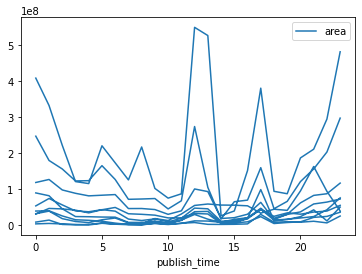

In [61]:
pd_df=data_df.toPandas()
pd_df.plot(x='publish_time', y ='sum(likes)',label ='area')



